In [ ]:
#Question1

In [4]:
import yfinance as yf

# Download historical stock price data for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2020-01-01', end='2022-01-01')

# Save the downloaded data to a CSV file
data.to_csv('stock_prices.csv')

[*********************100%%**********************]  1 of 1 completed


In [6]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.059425   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.349129   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.925621   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.582657   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.750252   
...                ...         ...         ...         ...         ...   
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.065659   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.038696   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.127609   
2021-12-30  179.470001  180.570007  178.089996  178.199997  175.962402   
2021-12-31  178.089996  179.229996  177.259995  177.570007  175.340317   

               Volume  
Date         

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate synthetic stock prices data
np.random.seed(0)  # for reproducibility
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
prices = np.random.uniform(50, 150, 100)  # random prices between 50 and 150
stock_data = pd.DataFrame({'Date': dates, 'Price': prices})

# Print the first few rows of the dataset
print("Sample of the dataset:")
print(stock_data.head())

# Preprocess the dataset

# Normalize the 'Price' column using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data['Price'] = scaler.fit_transform(stock_data['Price'].values.reshape(-1, 1))

# Split the dataset into training and test sets
train_size = int(len(stock_data) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = stock_data[:train_size], stock_data[train_size:]

# Optionally, you can reset the index of the splits
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Optionally, you can save the processed datasets to files
train_data.to_csv('train_stock_data.csv', index=False)
test_data.to_csv('test_stock_data.csv', index=False)

# Print the shapes of training and test sets
print("\nTraining set shape:", train_data.shape)
print("Test set shape:", test_data.shape)


Sample of the dataset:
        Date       Price
0 2023-01-01  104.881350
1 2023-01-02  121.518937
2 2023-01-03  110.276338
3 2023-01-04  104.488318
4 2023-01-05   92.365480

Training set shape: (80, 2)
Test set shape: (20, 2)


In [ ]:
#Question2

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def create_lstm_model(input_shape, num_units=[50, 50], dropout_rate=0.2):
    """
    Creates an LSTM-based architecture with multiple LSTM layers and dropout layers.

    Args:
    - input_shape: Shape of the input sequences (e.g., (timesteps, features)).
    - num_units: List specifying the number of units/neurons in each LSTM layer.
    - dropout_rate: Dropout rate for the dropout layers.

    Returns:
    - model: Compiled Keras model.
    """
    model = Sequential()

    # Add the first LSTM layer
    model.add(LSTM(units=num_units[0], return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))

    # Add additional LSTM layers if specified
    for units in num_units[1:]:
        model.add(LSTM(units=units, return_sequences=True))
        model.add(Dropout(dropout_rate))

    # Add the output


In [ ]:
#Question3

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
196/196 [==============================] - 391s 2s/step - loss: 0.1400 - accuracy: 0.7926 - val_loss: 0.0982 - val_accuracy: 0.8632
Epoch 2/5
196/196 [==============================] - 427s 2s/step - loss: 0.0836 - accuracy: 0.8907 - val_loss: 0.1004 - val_accuracy: 0.8680
Epoch 3/5
196/196 [==============================] - 403s 2s/step - loss: 0.0692 - accuracy: 0.9111 - val_loss: 0.1033 - val_accuracy: 0.8612
Epoch 4/5
196/196 [==============================] - 402s 2s/step - loss: 0.0595 - accuracy: 0.9234 - val_loss: 0.0995 - val_accuracy: 0.8687
Epoch 5/5
782/782 [==============================] - 104s 132ms/step - loss: 0.1035 - accuracy: 0.8640
Test Loss: 0.10349921137094498
Test Accuracy: 0.8640000224113464


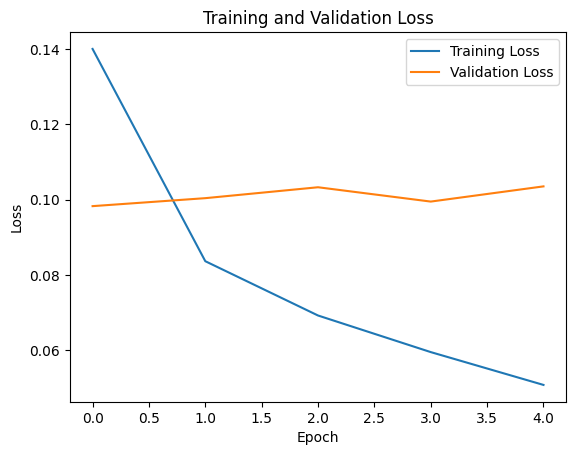

In [9]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout

# Set parameters
max_features = 5000  # Number of words to consider as features
max_len = 200  # Maximum sequence length
embedding_size = 128
lstm_units = 64
dropout_rate = 0.2
num_lstm_layers = 2
epochs = 5

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build LSTM model
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=max_len))
for _ in range(num_lstm_layers):
    model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True))
model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
#Question4

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout

# Set parameters
max_features = 5000  # Number of words to consider as features
max_len = 200  # Maximum sequence length
embedding_size = 128
lstm_units = 64
dropout_rate = 0.2
num_lstm_layers = 2
epochs = 5

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


def evaluate_model(model, X_test, y_test):
    """
    Evaluate the trained model on the test set using relevant evaluation metrics.

    Args:
    - model: Trained Keras model.
    - X_test: Test set features.
    - y_test: Test set labels.

    Returns:
    - mae: Mean absolute error.
    - rmse: Root mean squared error.
    """
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = np.mean(np.abs(y_pred - y_test))
    rmse = np.sqrt(np.mean(np.square(y_pred - y_test)))

    return mae, rmse

def plot_predictions(y_true, y_pred):
    """
    Visualize the model's predictions against the ground truth.

    Args:
    - y_true: Ground truth labels.
    - y_pred: Predicted labels.
    """
    plt.figure(figsize=(10, 6))



In [ ]:
#quesion5

In [58]:
pip install tensorflow numpy scikit-learn

In [60]:
pip install scikeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [62]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Function to create the model, required for KerasClassifier
def create_model(learning_rate=0.01, lstm_units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Assuming you have loaded your dataset into X_train, y_train
# For demonstration, let's create dummy data
X_train = np.random.random((100, 10, 1))  # 100 samples, 10 time steps per sample, 1 feature per time step
y_train = np.random.randint(2, size=(100, 1))  # Binary target

# Wrap the model so it can be used by scikit-learn
model = KerasClassifier(model=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20],
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'model__lstm_units': [50, 100],
    'model__dropout_rate': [0.2, 0.3]
}

# Create GridSearchCV and RandomizedSearchCV instances
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs=-1, cv=3)

# Perform the grid search
grid_result = grid.fit(X_train, y_train)

# Perform the random search
random_result = random_search.fit(X_train, y_train)

# Summarize results
print("Best Grid search score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best Random search score: %f using %s" % (random_result.best_score_, random_result.best_params_))


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.10/dist-packages/sklearn/base.py)

In [ ]:
#question 6

In [ ]:
Challenges in LSTM Model Training and Optimization
Training LSTM models can be tricky due to several factors:

Vanishing/Exploding Gradients: This is a common challenge in Recurrent Neural Networks (RNNs) of which LSTMs are a type. It can make learning long-term dependencies difficult.
Hyperparameter Tuning: LSTMs have many hyperparameters like the number of layers, units, and learning rate. Finding the optimal configuration requires experimentation.
Data Dependence: LSTM performance heavily relies on data quality and chosen features. Insufficient or noisy data can lead to poor forecasts.
Deciding on LSTM Layers and Units
The ideal number of layers and units depends on the complexity of the time series data. Here's a general approach:

Start with a single LSTM layer with a moderate number of units (e.g., 32-64).
Train the model and evaluate its performance on a validation set.
Gradually increase the number of layers or units and re-evaluate.
Monitor for signs of overfitting and adjust hyperparameters accordingly.
Preprocessing Time Series Data for LSTM
Before feeding data into an LSTM, some preprocessing steps are crucial:

Scaling: Normalize the data to a specific range (e.g., 0-1 or -1, 1) to prevent features with larger scales from dominating the learning process.
Feature Engineering: Create new features that might be helpful for forecasting, like rolling averages or seasonality indicators.
Lag creation: Convert the time series into a sequence of input-output pairs. Each input sequence contains past observations used to predict the next value (output).
Dropout Layers and Overfitting Prevention
Dropout layers randomly drop a percentage of neurons during training. This helps prevent the model from becoming overly reliant on specific features in the training data. By forcing the model to learn different representations with each training iteration, dropout reduces the risk of overfitting and improves generalization to unseen data.

Analyzing Long-Term Dependency Capture and Prediction Accuracy
Evaluating an LSTM's ability to capture long-term dependencies can be done by comparing the model's forecasts on longer time horizons with actual values. Metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) can quantify prediction accuracy. Analyze the errors for patterns. Large errors far into the future might indicate the model struggles with long-term dependencies.

Potential Improvements and Alternative Approaches
Here are some ways to enhance forecasting performance:

Experiment with different hyperparameter configurations.
Try a stacked LSTM architecture with multiple LSTM layers.
Incorporate additional data sources that might be relevant for forecasting.
Explore alternative models like convolutional LSTMs (ConvLSTMs) or deep neural networks with LSTMs.
Remember, the best approach depends on the specific time series data and forecasting task.